Modelos aditivos generalizados.

Tratamiento de no linealidades - exp bases

Comprender importancias de un hiperparatero

transformaciones no lineales de atributos

Se busca generar una recta de mejor ajuste cuando tengamos alto sesgo

Forma de solucionar el subajuste



Soluciones a la no linealidad

La linea --> forma funcional presenta alto sesgo

Polinomial (splaints) -->Reduce la capacidad de generalizacion del modelo

GLM --> FLexibiliza el proceso de generacion de datos pero sigue siendo lineal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pygam
import warnings
import lec2_graphs as afx
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

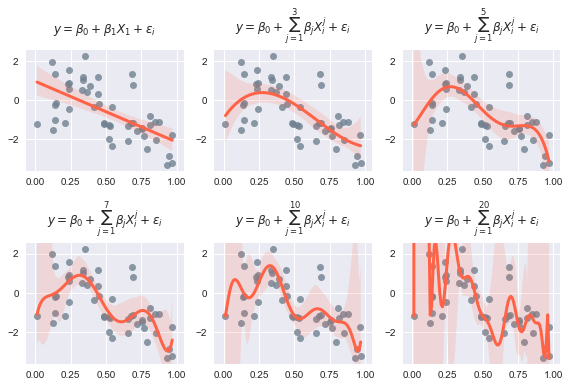

In [2]:
afx.polynomial_degrees()

Solucion de GAM 

implementa funciones de vinculos
flexibiliza el comportamiento del vector objetivo
la fincion identidad especifica permite flexibilizar el comportamiento de splines en cada parametro.


Objeticos de GAM: Estimar las funciones de identidad

Hay dos elementos a considerar:
¿Como se obtienen?
¿Como nos aseguramos que sean optimas?

Se obtienen mediantes backfiting
igualamos el parametro al promedio de observacinones Y


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df= pd.read_csv('kc_house_data.csv')

In [4]:
df.drop(['zipcode', 'id', 'date'],axis=1,inplace=True)

In [5]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21608           0     0          3      8        1530              0   
21609           0     0          3      8        2310              0   
21610           0     0          3      7        1020              0   
21611           0     0          3      8        1600              0   
21612           0     0          3      7        1020              0   

       yr_built  yr_renovated      lat     long  sqft_living15  sqft_lot15  
0          1955             0  47.5112 -122.257           1340        5650  
1          1951          1991  47.7210 -122.319           1690        7639  
2          1933             0  47.7379 -122.233           2720        8062  
3          1965             0  47.5208 -122.393           1360        5000  
4          1987             0  47.6168 -122.045           1800        7503  
...         ...           ...      ...      ...            ...         ...  
21608      2009             0  47.6993 -122.346           1530        1509  
21609      2014             0  47.5107 -122.362           1830        7200  
21610      2009             0  47.5944 -122.299           1020        2007  
21611      2004             0  47.5345 -122.069           1410        1287  
21612      2008             0  47.5941 -122.299           1020        1357  

[21613 rows x 18 columns]

In [6]:
scaler = StandardScaler()

In [7]:
df_scaled=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [8]:
df_scaled['price'] = np.log(df['price'])

In [9]:
X= df_scaled.iloc[:,1:]

In [10]:
N = X.shape[0]

In [11]:
X.insert(X.shape[1],'intercept',np.ones(N))

In [12]:
y = df_scaled['price']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=63)

In [14]:
from pygam import LinearGAM

In [15]:
search_params = {'lam': np.logspace(-3,3,10)}

In [16]:
search_params

{'lam': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
        4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
        2.15443469e+02, 1.00000000e+03])}

In [22]:
lam=np.logspace(-3, 3, 10)

In [23]:
gam = LinearGAM().gridsearch(X_train, y_train,**search_params)

100% (10 of 10) |########################| Elapsed Time: 0:00:16 Time:  0:00:16


In [24]:
gam

LinearGAM(callbacks=[Deviance(), Diffs()], constraints=None, 
   dtype='auto', fit_intercept=True, fit_linear=False, 
   fit_splines=True, lam=2.1544, max_iter=100, n_splines=25, 
   penalties='auto', scale=None, spline_order=3, tol=0.0001, 
   verbose=False)

In [25]:
gam.lam

2.154434690031882

In [27]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    167.2593
Link Function:                     IdentityLink Log Likelihood:                               -162853.8825
Number of Samples:                        15129 AIC:                                           326044.2835
                                                AICc:                                           326048.091
                                                GCV:                                                0.0384
                                                Scale:                                              0.0377
                                                Pseudo R-Squared:                                   0.8673
Feature Function   Data Type      Num

Columna, tipo de dato, numero maximo de splines, grado del termino, existio un fit lineal, paramtro de regularizacion, nivel de significancia asociado.

Dependencia Parcial

In [28]:
from pygam.utils import generate_X_grid

In [29]:
x_grid = generate_X_grid(gam)
attribute = X_train.columns
cols=6; rows = int(len(attribute)/cols)

In [ ]:
for i, n in enumerate(range)